In [1]:
# Import Dependencies

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
# Import and read csv's

JPM_2016 = pd.read_csv('resources/JPM_q4_2016.csv')
JPM_2017 = pd.read_csv('resources/JPM_q4_2017.csv')
JPM_2018 = pd.read_csv('resources/JPM_q4_2018.csv')

In [3]:
# Join 2016 and 2017

JPM_2yr_q4 = pd.concat([JPM_2016, JPM_2017], ignore_index=True)
JPM_2yr_q4 = JPM_2yr_q4.drop(columns=['Unnamed: 0'])
JPM_2yr_q4.to_csv('resources/JPM_2yr_q4.csv')
JPM_2yr_q4.head()

,Date,Open,High,Low,Close,Volume,Dividend
0,2016-10-03,66.35,66.92,66.26,66.51,14898676.0,0.00
1,2016-10-04,66.21,67.18,66.10,66.60,17226890.0,0.48
2,2016-10-05,66.89,68.07,66.80,67.69,16279971.0,0.00
3,2016-10-06,67.73,67.97,67.05,67.87,17483910.0,0.00
4,2016-10-07,67.79,68.18,67.40,68.11,18496219.0,0.00


In [4]:
# Reshape for regression test

x = JPM_2017.Open.values.reshape(-1, 1)
y = JPM_2017.Close.values.reshape(-1, 1)

print("Shape: ", x.shape, y.shape)

Shape:  (63, 1) (63, 1)


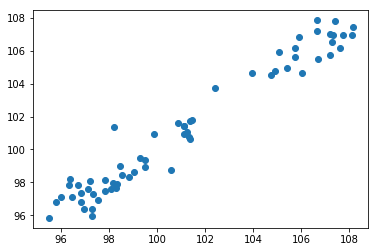

In [5]:
# Plot Scatter Graph

plt.scatter(x, y)

In [6]:
JPM_2017_model = LinearRegression()
JPM_2017_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
# Weight coefficient and y-int

print('Weight coefficients: ', JPM_2017_model.coef_)
print('y-axis intercept: ', JPM_2017_model.intercept_)

Weight coefficients:  [[0.93090776]]
y-axis intercept:  [7.03088882]


In [8]:
# x and y mins and maxs

JPM_2017_x_min = np.array([[x.min()]])
JPM_2017_x_max = np.array([[x.max()]])
print(f"Min x Value: {JPM_2017_x_min}")
print(f"Max x Value: {JPM_2017_x_max}")

JPM_2017_y_min = JPM_2017_model.predict(JPM_2017_x_min)
JPM_2017_y_max = JPM_2017_model.predict(JPM_2017_x_max)

Min x Value: [[95.48]]
Max x Value: [[108.13]]


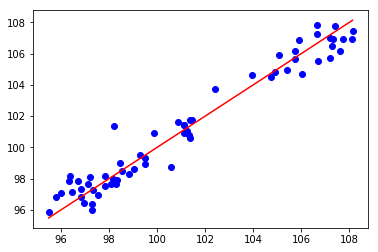

In [9]:
# Show Linear Regression

plt.scatter(x, y, c='blue')
plt.plot([JPM_2017_x_min[0], JPM_2017_x_max[0]], [JPM_2017_x_min[0], JPM_2017_x_max[0]], c='red')
plt.savefig('JPM_q4_regression.png')

In [10]:
JPM_2017_model.score(x, y)

0.9528454450767256

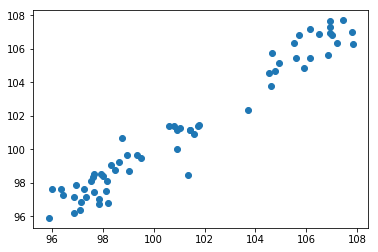

In [11]:
predictions = JPM_2017_model.predict(x)
plt.scatter(y, predictions)